In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing Dataset
train = pd.read_csv("train.csv", parse_dates=["Date"])
features = pd.read_csv("features.csv", parse_dates=["Date"])
stores = pd.read_csv("stores.csv")

In [ ]:
#Merging Dataset
df = pd.merge(train, features, on =["Store", "Date", "IsHoliday"], how='left')

df = pd.merge(df, stores, on="Store", how="left")

In [ ]:
#Saving the merged file
df.to_csv("walmart_cleaned.csv", index=False)
print("CSV saved successfully ✅")

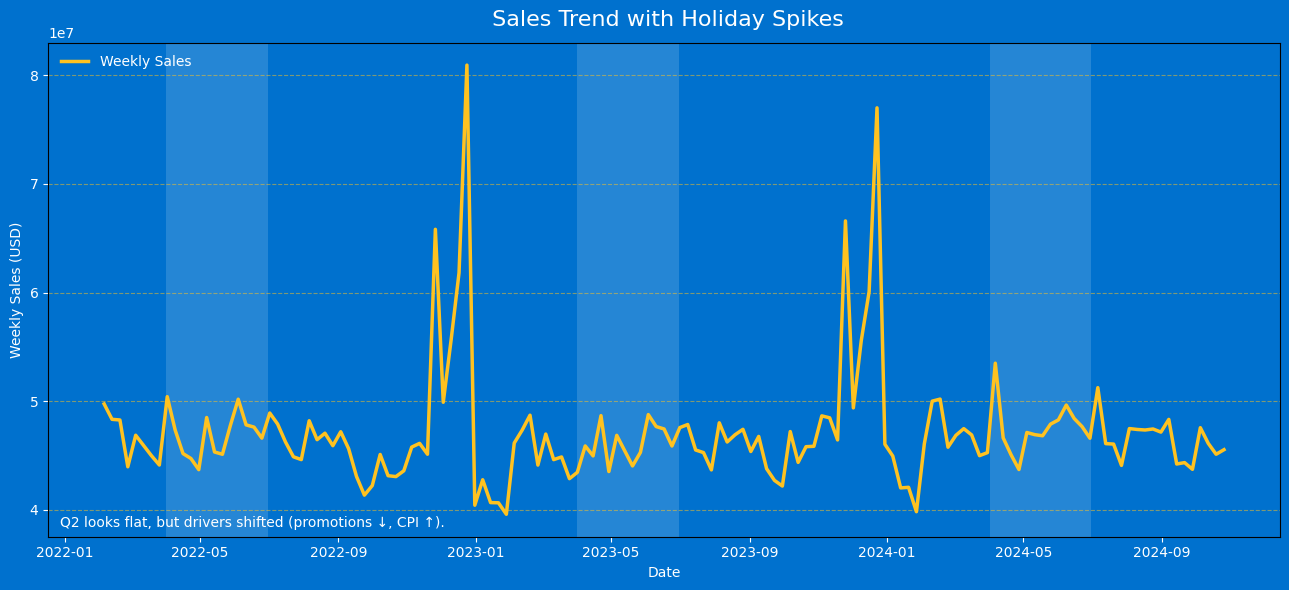

In [ ]:

# Walmart brand colors
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"

# Aggregate weekly sales
weekly_sales = df.groupby("Date", as_index=False)["Weekly_Sales"].sum().sort_values("Date")

fig, ax = plt.subplots(figsize=(13,6))

# Set Walmart blue background
fig.patch.set_facecolor(WALMART_BLUE)
ax.set_facecolor(WALMART_BLUE)

# Plot sales line in Walmart yellow
ax.plot(
    weekly_sales["Date"],
    weekly_sales["Weekly_Sales"],
    color=WALMART_YELLOW,
    linewidth=2.5,
    label="Weekly Sales"
)

# Highlight Q2 (Apr–Jun) with a semi-transparent white band
years = sorted(weekly_sales["Date"].dt.year.unique())
for y in years:
    q2_start = pd.Timestamp(year=y, month=4, day=1)
    q2_end   = pd.Timestamp(year=y, month=6, day=30)
    start = max(q2_start, weekly_sales["Date"].min())
    end   = min(q2_end, weekly_sales["Date"].max())
    if start < end:
        ax.axvspan(start, end, color=WHITE, alpha=0.15, lw=0)

# Title & labels in white
ax.set_title(" Sales Trend with Holiday Spikes", color=WHITE, fontsize=16, pad=12)
ax.set_xlabel("Date", color=WHITE)
ax.set_ylabel("Weekly Sales (USD)", color=WHITE)

# Tick labels in white
ax.tick_params(colors=WHITE)

# Grid lines in light yellow
ax.yaxis.grid(True, color=WALMART_YELLOW, linestyle="--", linewidth=0.8, alpha=0.5)

# Format x-axis dates
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

# Annotation in white
ax.text(
    0.01, 0.02,
    "Q2 looks flat, but drivers shifted (promotions ↓, CPI ↑).",
    transform=ax.transAxes,
    fontsize=10,
    color=WHITE
)

# Legend in white border/text
leg = ax.legend(frameon=False, loc="upper left")
for text in leg.get_texts():
    text.set_color(WHITE)

plt.tight_layout()
plt.show()

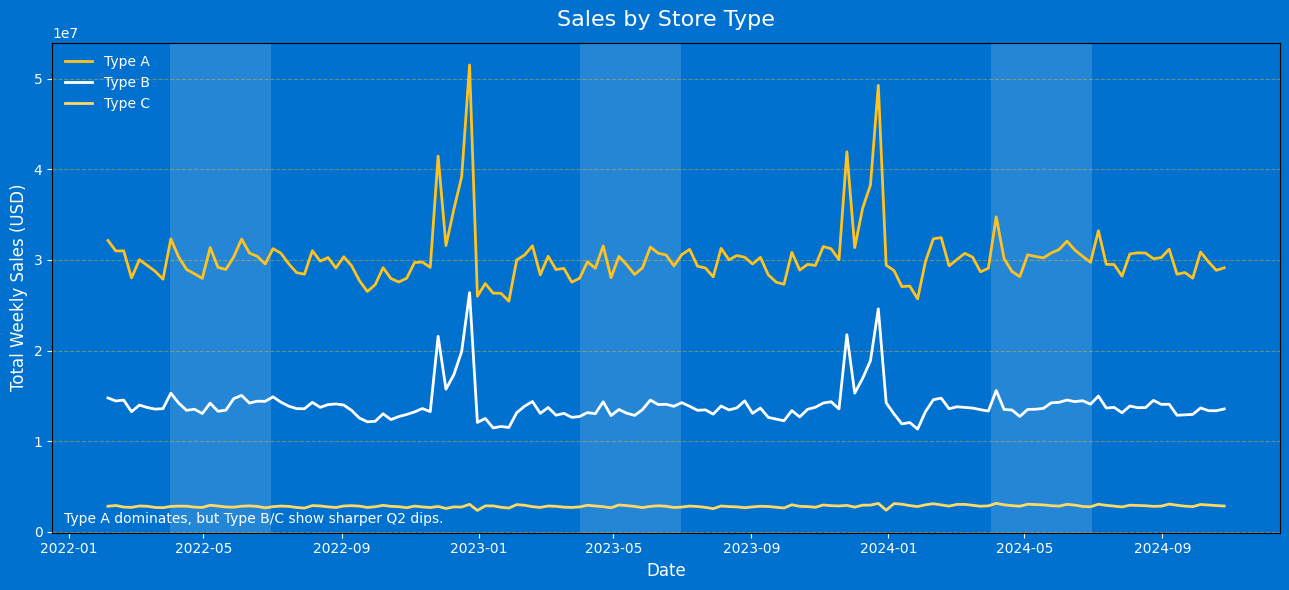

In [ ]:

# Walmart brand colors
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"

# Aggregate weekly sales by store type
type_sales = df.groupby(["Date","Type"], as_index=False)["Weekly_Sales"].sum()

fig, ax = plt.subplots(figsize=(13,6))

# Walmart blue background
fig.patch.set_facecolor(WALMART_BLUE)
ax.set_facecolor(WALMART_BLUE)

# Assign contrasting colors for store types
color_map = {"A": WALMART_YELLOW, "B": WHITE, "C": "#FFD966"}  # yellow, white, light yellow

for t in type_sales["Type"].unique():
    subset = type_sales[type_sales["Type"]==t]
    ax.plot(
        subset["Date"],
        subset["Weekly_Sales"],
        label=f"Type {t}",
        linewidth=2,
        color=color_map.get(t, WHITE)
    )

# Shade Q2 (Apr–Jun) with transparent white overlay
years = sorted(type_sales["Date"].dt.year.unique())
for y in years:
    q2_start = pd.Timestamp(year=y, month=4, day=1)
    q2_end   = pd.Timestamp(year=y, month=6, day=30)
    start = max(q2_start, type_sales["Date"].min())
    end   = min(q2_end, type_sales["Date"].max())
    if start < end:
        ax.axvspan(start, end, color=WHITE, alpha=0.15, lw=0)

# Title & labels in white
ax.set_title("Sales by Store Type", fontsize=16, color=WHITE, pad=12)
ax.set_xlabel("Date", fontsize=12, color=WHITE)
ax.set_ylabel("Total Weekly Sales (USD)", fontsize=12, color=WHITE)

# Ticks in white
ax.tick_params(colors=WHITE)

# Grid lines in faint yellow
ax.yaxis.grid(True, color=WALMART_YELLOW, linestyle="--", linewidth=0.8, alpha=0.4)

# Annotation
ax.text(
    0.01, 0.02,
    "Type A dominates, but Type B/C show sharper Q2 dips.",
    transform=ax.transAxes,
    fontsize=10,
    color=WHITE
)

# Legend styled
leg = ax.legend(frameon=False, loc="upper left")
for text in leg.get_texts():
    text.set_color(WHITE)

plt.tight_layout()
plt.show()

Top 5 Departments: [92, 95, 38, 72, 90]


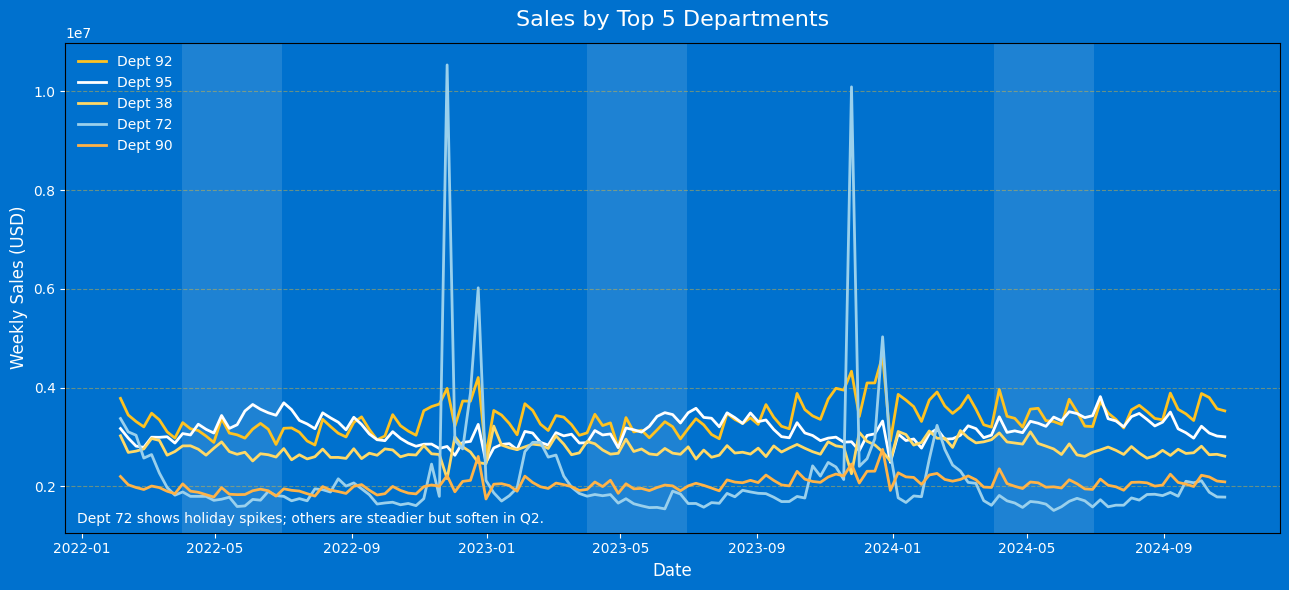

In [ ]:
# Walmart brand colors
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"

# Find top 5 departments by total sales
dept_totals = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False).head(5)
top_depts = dept_totals.index.tolist()
print("Top 5 Departments:", top_depts)

# Weekly sales for those departments
dept_sales = df[df["Dept"].isin(top_depts)].groupby(["Date","Dept"], as_index=False)["Weekly_Sales"].sum()

fig, ax = plt.subplots(figsize=(13,6))

# Walmart blue background
fig.patch.set_facecolor(WALMART_BLUE)
ax.set_facecolor(WALMART_BLUE)

# Choose distinct bright colors for visibility against blue background
colors = [WALMART_YELLOW, WHITE, "#FFD966", "#9AD0EC", "#FFB347"]

for d, c in zip(top_depts, colors):
    subset = dept_sales[dept_sales["Dept"]==d]
    ax.plot(
        subset["Date"],
        subset["Weekly_Sales"],
        label=f"Dept {d}",
        linewidth=2,
        color=c
    )

# Shade Q2 (Apr–Jun) with transparent white overlay
years = sorted(dept_sales["Date"].dt.year.unique())
for y in years:
    q2_start = pd.Timestamp(year=y, month=4, day=1)
    q2_end   = pd.Timestamp(year=y, month=6, day=30)
    start = max(q2_start, dept_sales["Date"].min())
    end   = min(q2_end, dept_sales["Date"].max())
    if start < end:
        ax.axvspan(start, end, color=WHITE, alpha=0.12, lw=0)

# Titles & labels
ax.set_title("Sales by Top 5 Departments", fontsize=16, color=WHITE, pad=12)
ax.set_xlabel("Date", fontsize=12, color=WHITE)
ax.set_ylabel("Weekly Sales (USD)", fontsize=12, color=WHITE)

# Ticks in white
ax.tick_params(colors=WHITE)

# Grid lines in faint yellow
ax.yaxis.grid(True, color=WALMART_YELLOW, linestyle="--", linewidth=0.8, alpha=0.4)

# Annotation
ax.text(
    0.01, 0.02,
    "Dept 72 shows holiday spikes; others are steadier but soften in Q2.",
    transform=ax.transAxes,
    fontsize=10,
    color=WHITE
)

# Legend
leg = ax.legend(frameon=False, loc="upper left")
for text in leg.get_texts():
    text.set_color(WHITE)

plt.tight_layout()
plt.show()

/var/folders/1j/smy8v6_n3mg29qpw8_xt5mlh0000gn/T/ipykernel_31998/3964910670.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, rotation=45, ha="right", color=WHITE)


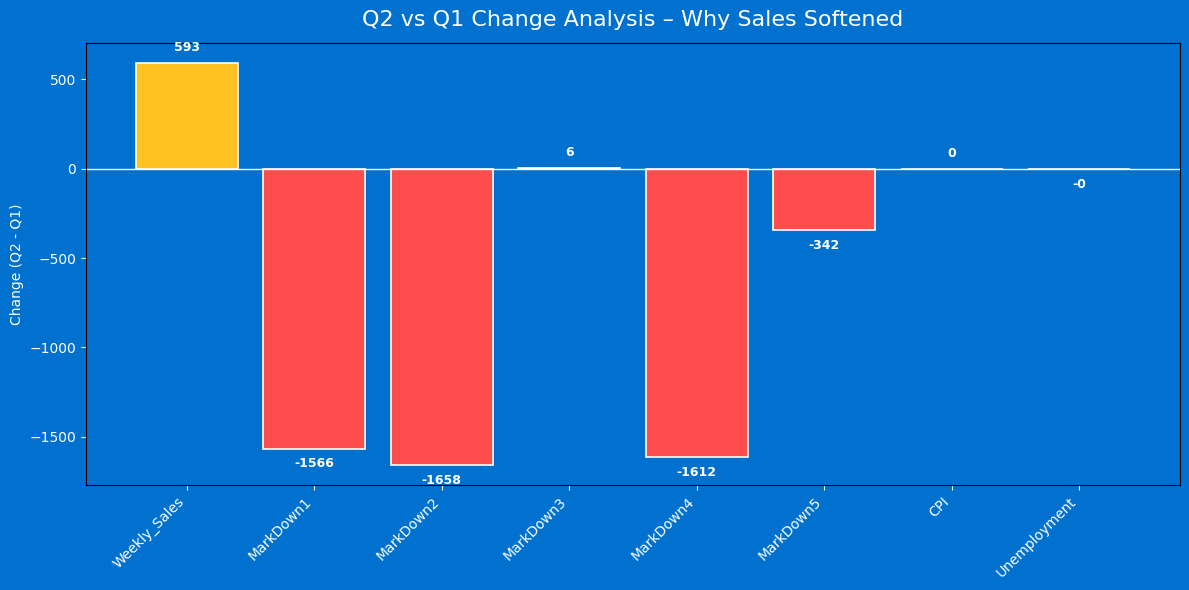

In [ ]:
# Walmart brand colors
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"
RED            = "#FF4C4C"   # softer red for negative bars



# Build quarterly summary

# Assume deltas from your calculation
order = ["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"]
qtab = df.groupby("Quarter")[order].mean()
deltas = (qtab.loc[2, order] - qtab.loc[1, order])  # ensure qtab is defined

fig, ax = plt.subplots(figsize=(12,6))

# Walmart blue background
fig.patch.set_facecolor(WALMART_BLUE)
ax.set_facecolor(WALMART_BLUE)

# Bar colors: green for positive, yellow/red for negative
colors = [WALMART_YELLOW if v>0 else RED for v in deltas.values]

bars = ax.bar(order, deltas.values, color=colors, edgecolor=WHITE, linewidth=1.2)

# Horizontal line at 0
ax.axhline(0, color=WHITE, linewidth=1)

# Title & labels in white
ax.set_title("Q2 vs Q1 Change Analysis – Why Sales Softened", fontsize=16, color=WHITE, pad=12)
ax.set_ylabel("Change (Q2 - Q1)", color=WHITE)
ax.tick_params(colors=WHITE)
ax.set_xticklabels(order, rotation=45, ha="right", color=WHITE)

# Value labels on bars
for i, v in enumerate(deltas.values):
    ax.text(
        i, v + (50 if v>0 else -50), 
        f"{v:.0f}", 
        ha="center", va="bottom" if v>0 else "top", 
        fontsize=9, color=WHITE, fontweight="bold"
    )

plt.tight_layout()
plt.show()

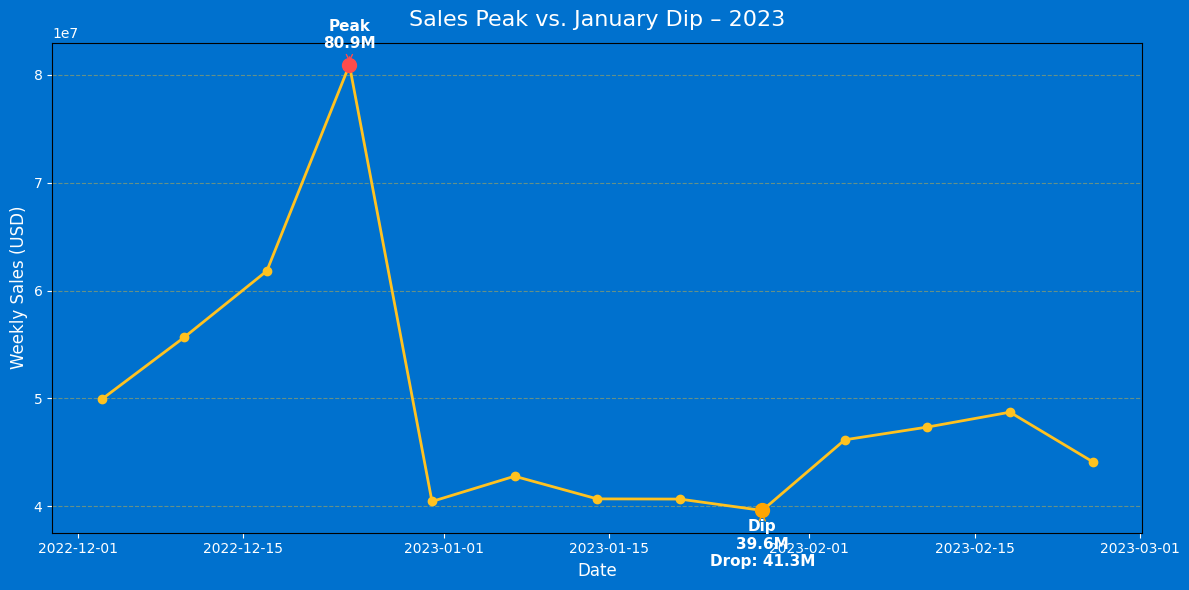

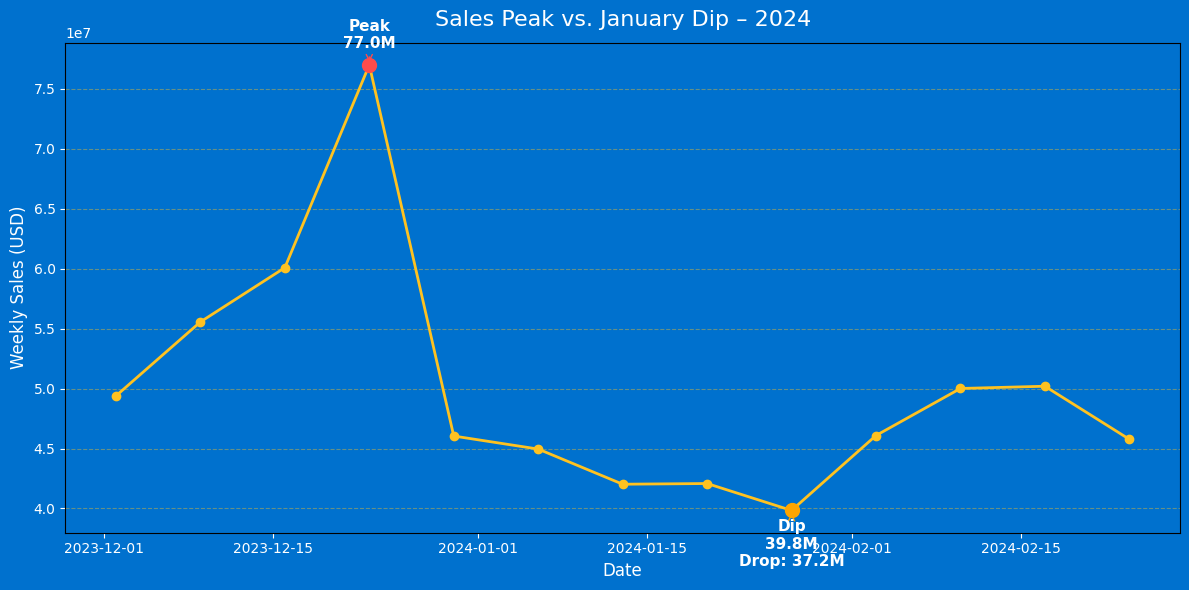

In [ ]:
# Walmart brand colors
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"
ORANGE         = "#FFA500"
RED            = "#FF4C4C"

# Aggregate weekly sales
weekly_sales = df.groupby("Date", as_index=False)["Weekly_Sales"].sum().sort_values("Date")

def plot_january_dip(year):
    # Filter Dec previous year to Feb current year
    start = pd.Timestamp(year-1, 12, 1)
    end   = pd.Timestamp(year, 2, 28)
    window = weekly_sales[(weekly_sales["Date"] >= start) & (weekly_sales["Date"] <= end)]

    # Peak = highest point in December (holiday spike)
    dec_data = window[window["Date"].dt.month == 12]
    peak_row = dec_data.loc[dec_data["Weekly_Sales"].idxmax()]
    peak_date, peak_sales = peak_row["Date"], peak_row["Weekly_Sales"]

    # Dip = lowest point in January
    jan_data = window[window["Date"].dt.month == 1]
    dip_row = jan_data.loc[jan_data["Weekly_Sales"].idxmin()]
    dip_date, dip_sales = dip_row["Date"], dip_row["Weekly_Sales"]

    # Plot with Walmart theme
    fig, ax = plt.subplots(figsize=(12,6))
    fig.patch.set_facecolor(WALMART_BLUE)
    ax.set_facecolor(WALMART_BLUE)

    # Sales line
    ax.plot(window["Date"], window["Weekly_Sales"], marker="o", color=WALMART_YELLOW, linewidth=2)

    # Highlight peak
    ax.scatter(peak_date, peak_sales, color=RED, s=100, zorder=5)
    ax.annotate(f"Peak\n{peak_sales/1e6:.1f}M", (peak_date, peak_sales),
                xytext=(0,12), textcoords="offset points",
                ha="center", color=WHITE, fontsize=11, fontweight="bold",
                arrowprops=dict(arrowstyle="->", color=RED))

    # Highlight dip
    ax.scatter(dip_date, dip_sales, color=ORANGE, s=100, zorder=5)
    ax.annotate(f"Dip\n{dip_sales/1e6:.1f}M\nDrop: {(peak_sales-dip_sales)/1e6:.1f}M",
                (dip_date, dip_sales),
                xytext=(0,-40), textcoords="offset points",
                ha="center", color=WHITE, fontsize=11, fontweight="bold",
                arrowprops=dict(arrowstyle="->", color=ORANGE))

    # Labels and title
    ax.set_title(f"Sales Peak vs. January Dip – {year}", fontsize=16, color=WHITE, pad=12)
    ax.set_xlabel("Date", fontsize=12, color=WHITE)
    ax.set_ylabel("Weekly Sales (USD)", fontsize=12, color=WHITE)

    # Ticks & grid
    ax.tick_params(colors=WHITE)
    ax.yaxis.grid(True, color=WALMART_YELLOW, linestyle="--", linewidth=0.8, alpha=0.4)

    plt.tight_layout()
    plt.show()

# Example run
plot_january_dip(2023)
plot_january_dip(2024)

Peak 2023: 2022-12-24 | Dip 2023: 2023-01-28


Date,Peak,Dip,Change
Weekly_Sales,27378.692693,13566.239462,-13812.453231
MarkDown1,0.000000,0.000000,0.000000
MarkDown2,0.000000,0.000000,0.000000
MarkDown3,0.000000,0.000000,0.000000
MarkDown4,0.000000,0.000000,0.000000
MarkDown5,0.000000,0.000000,0.000000
CPI,168.137932,168.705433,0.567501
Unemployment,8.430285,8.242368,-0.187917


/var/folders/1j/smy8v6_n3mg29qpw8_xt5mlh0000gn/T/ipykernel_31998/3987063059.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(changes.index, rotation=45, ha="right", color=WHITE)


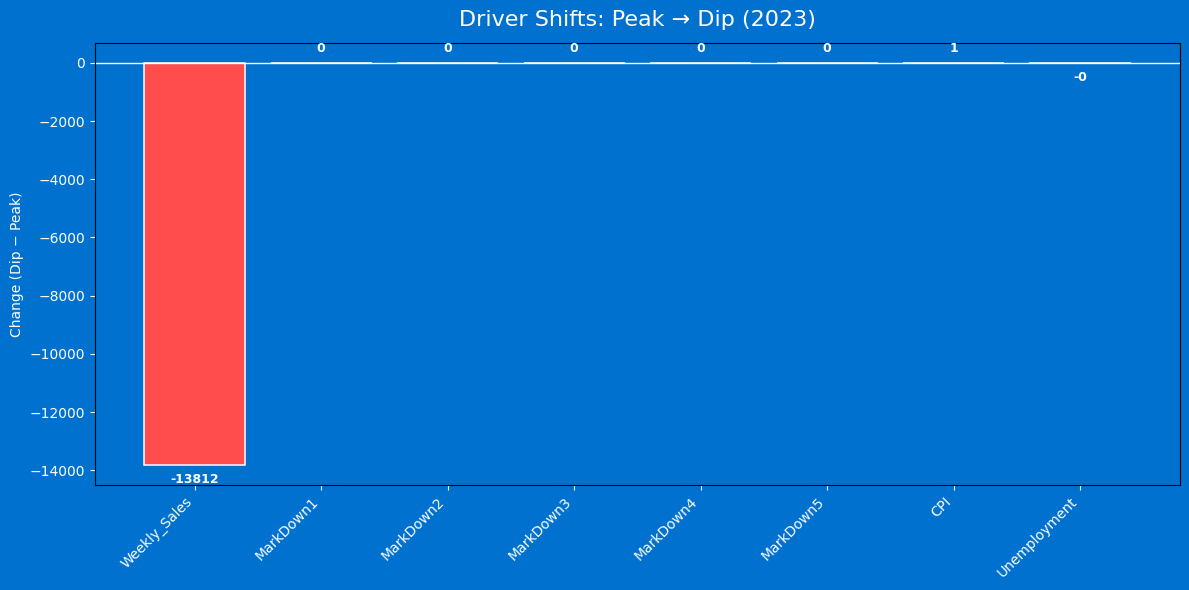

Worst department drops (Dip − Peak):
Date
2022-12-24   NaN
2023-01-28   NaN
Name: Change, dtype: float64

Store type % change:
Date
2022-12-24   NaN
2023-01-28   NaN
Name: Change_%, dtype: float64


In [ ]:
# Ensure helpers exist
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Metrics to compare
METRICS = [
    "Weekly_Sales","MarkDown1","MarkDown2","MarkDown3",
    "MarkDown4","MarkDown5","CPI","Unemployment"
]

def get_peak_dip_dates(df, year):
    """Find the real peak (Dec of year-1) and dip (Jan of year) dates that exist in the data."""
    wk = df.groupby("Date", as_index=False)["Weekly_Sales"].sum()

    dec = wk[(wk["Date"].dt.year == year-1) & (wk["Date"].dt.month == 12)]
    jan = wk[(wk["Date"].dt.year == year)   & (wk["Date"].dt.month == 1)]
    if dec.empty or jan.empty:
        raise ValueError(f"Missing Dec {year-1} or Jan {year} in data. "
                         f"Available years: {sorted(wk['Date'].dt.year.unique())}")

    peak_date = dec.loc[dec["Weekly_Sales"].idxmax(), "Date"]
    dip_date  = jan.loc[jan["Weekly_Sales"].idxmin(), "Date"]
    return peak_date, dip_date

def compare_peak_dip(df, year, metrics=METRICS):
    """Return a Peak vs Dip table and the (Dip - Peak) deltas for the given year."""
    peak_date, dip_date = get_peak_dip_dates(df, year)

    comp = (df[df["Date"].isin([peak_date, dip_date])]
            .groupby("Date")[metrics]
            .mean()
           )

    # Rename by index (safer than setting columns)
    comp = comp.rename(index={peak_date: "Peak", dip_date: "Dip"})
    if not {"Peak","Dip"}.issubset(set(comp.index)):
        raise ValueError(f"Could not find both Peak and Dip rows.\nFound: {list(comp.index)}")

    comp = comp.loc[["Peak","Dip"]].T  # rows = metrics, cols = ["Peak","Dip"]
    comp["Change"] = comp["Dip"] - comp["Peak"]
    return comp, peak_date, dip_date

# ----- Run for a year (change YEAR to 2023 or 2024 etc.) -----
YEAR = 2023
comp_2023, peak_date_2023, dip_date_2023 = compare_peak_dip(df, YEAR)
print(f"Peak {YEAR}: {peak_date_2023.date()} | Dip {YEAR}: {dip_date_2023.date()}")
display(comp_2023)

# --- Waterfall-style bar (Walmart theme) ---
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"
RED            = "#FF4C4C"

changes = comp_2023["Change"]

fig, ax = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor(WALMART_BLUE)
ax.set_facecolor(WALMART_BLUE)

colors = [WALMART_YELLOW if v>0 else RED for v in changes.values]
bars = ax.bar(changes.index, changes.values, color=colors, edgecolor=WHITE, linewidth=1.1)
ax.axhline(0, color=WHITE, linewidth=1)

ax.set_title(f"Driver Shifts: Peak → Dip ({YEAR})", color=WHITE, fontsize=16, pad=12)
ax.set_ylabel("Change (Dip − Peak)", color=WHITE)
ax.tick_params(colors=WHITE)
ax.set_xticklabels(changes.index, rotation=45, ha="right", color=WHITE)

for i, v in enumerate(changes.values):
    ax.text(i, v + (0.02 * max(abs(changes.values)) * (1 if v>=0 else -1)),
            f"{v:.0f}", ha="center", va="bottom" if v>=0 else "top",
            fontsize=9, color=WHITE, fontweight="bold")

plt.tight_layout()
plt.show()

# ----- Optional: department & store-type breakdowns for the same two weeks -----
# Departments: which dropped most (top 8 falls)
dept_comp = (df[df["Date"].isin([peak_date_2023, dip_date_2023])]
             .groupby(["Date","Dept"])["Weekly_Sales"].sum().unstack(fill_value=0))
dept_comp["Change"] = dept_comp.loc[dip_date_2023] - dept_comp.loc[peak_date_2023]
print("Worst department drops (Dip − Peak):")
print(dept_comp["Change"].sort_values().head(8))

# Store types: % change
type_comp = (df[df["Date"].isin([peak_date_2023, dip_date_2023])]
             .groupby(["Date","Type"])["Weekly_Sales"].sum().unstack(fill_value=0))
type_comp["Change_%"] = ((type_comp.loc[dip_date_2023] - type_comp.loc[peak_date_2023])
                         / type_comp.loc[peak_date_2023] * 100)
print("\nStore type % change:")
print(type_comp["Change_%"].round(1))

/var/folders/1j/smy8v6_n3mg29qpw8_xt5mlh0000gn/T/ipykernel_31998/1154804878.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pct_change.index, color=WHITE)


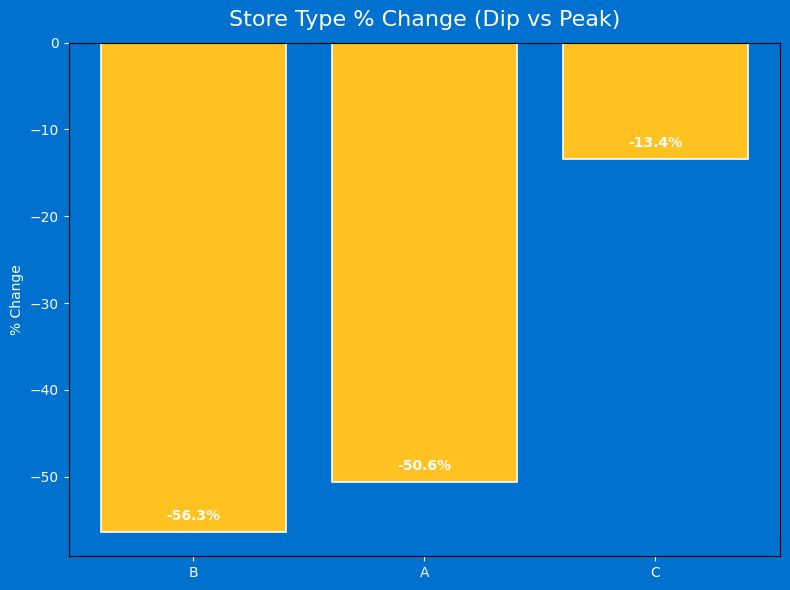

In [ ]:
# Walmart theme colors
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"
RED            = "#FF4C4C"


# --- 2. Store Type % Change Chart ---
def plot_storetype_drop(df, peak_date, dip_date):
    type_comp = (df[df["Date"].isin([peak_date, dip_date])]
                 .groupby(["Date","Type"])["Weekly_Sales"].sum().unstack(fill_value=0))
    pct_change = ((type_comp.loc[dip_date] - type_comp.loc[peak_date])
                  / type_comp.loc[peak_date] * 100).sort_values()

    fig, ax = plt.subplots(figsize=(8,6))
    fig.patch.set_facecolor(WALMART_BLUE)
    ax.set_facecolor(WALMART_BLUE)

    bars = ax.bar(pct_change.index, pct_change.values,
                  color=WALMART_YELLOW, edgecolor=WHITE, linewidth=1.2)

    ax.set_title("Store Type % Change (Dip vs Peak)", fontsize=16, color=WHITE, pad=12)
    ax.set_ylabel("% Change", color=WHITE)
    ax.tick_params(colors=WHITE)
    ax.set_xticklabels(pct_change.index, color=WHITE)

    # Annotate values
    for i, v in enumerate(pct_change.values):
        ax.text(i, v+1, f"{v:.1f}%", ha="center", va="bottom",
                fontsize=10, color=WHITE, fontweight="bold")

    plt.tight_layout()
    plt.show()

# ---- Run for your Peak & Dip dates ----
YEAR = 2023
peak_date, dip_date = get_peak_dip_dates(df, YEAR)

plot_storetype_drop(df, peak_date, dip_date)

/var/folders/1j/smy8v6_n3mg29qpw8_xt5mlh0000gn/T/ipykernel_31998/2401199183.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(worst.index.astype(str), rotation=45, ha="right", color=WHITE)


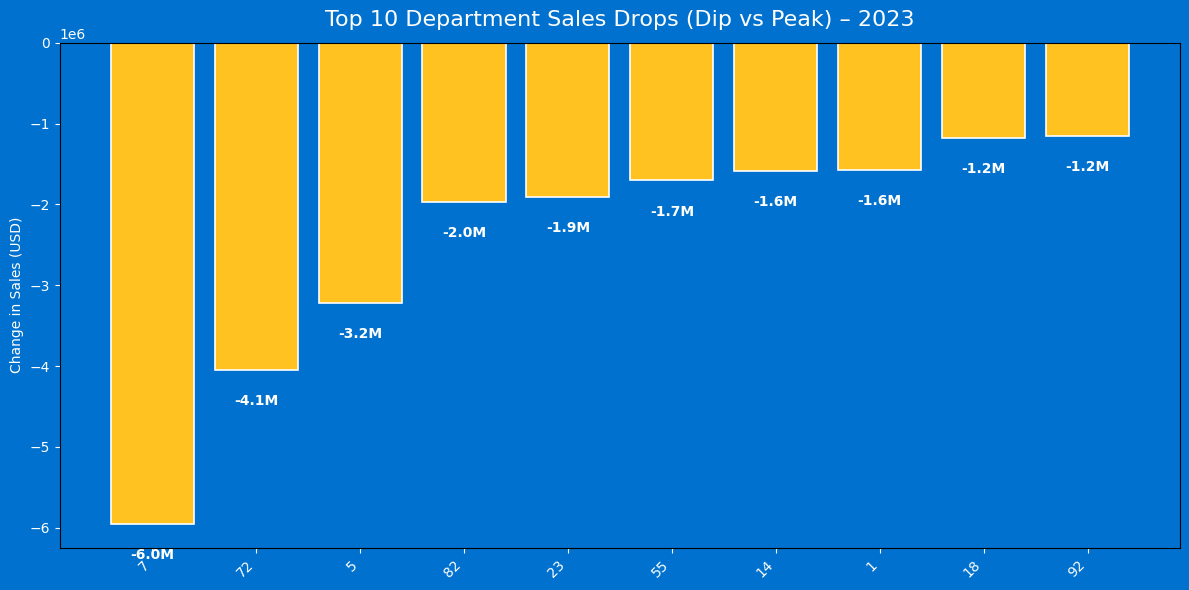

In [ ]:
# Walmart theme
WALMART_BLUE   = "#0071CE"
WALMART_YELLOW = "#FFC220"
WHITE          = "#FFFFFF"
RED            = "#FFC220"

# ---- helpers from earlier ----
def get_peak_dip_dates(df, year):
    wk = df.groupby("Date", as_index=False)["Weekly_Sales"].sum()
    dec = wk[(wk["Date"].dt.year == year-1) & (wk["Date"].dt.month == 12)]
    jan = wk[(wk["Date"].dt.year == year)   & (wk["Date"].dt.month == 1)]
    peak_date = dec.loc[dec["Weekly_Sales"].idxmax(), "Date"]
    dip_date  = jan.loc[jan["Weekly_Sales"].idxmin(), "Date"]
    return peak_date, dip_date

def plot_department_drops(df, year, top_n=10):
    peak_date, dip_date = get_peak_dip_dates(df, year)

    # Pivot so rows=Dept, cols=Date -> values=Weekly_Sales
    dept_pivot = (df[df["Date"].isin([peak_date, dip_date])]
                  .groupby(["Dept","Date"])["Weekly_Sales"]
                  .sum().unstack(fill_value=0))

    # Compute change as a Series (Dip - Peak), index=Dept
    # NOTE: use .get() with default 0 in case a dept is missing on either date
    change_by_dept = dept_pivot.get(dip_date, pd.Series(0, index=dept_pivot.index)) \
                     - dept_pivot.get(peak_date, pd.Series(0, index=dept_pivot.index))

    worst = change_by_dept.sort_values().head(top_n)

    if worst.empty:
        print(f"No department-level differences found for {peak_date.date()} vs {dip_date.date()}.")
        return

    # ---- plot (Walmart theme, blue background) ----
    fig, ax = plt.subplots(figsize=(12,6))
    fig.patch.set_facecolor(WALMART_BLUE)
    ax.set_facecolor(WALMART_BLUE)

    ax.bar(worst.index.astype(str), worst.values,
           color=RED, edgecolor=WHITE, linewidth=1.2)

    ax.set_title(f"Top {top_n} Department Sales Drops (Dip vs Peak) – {year}",
                 fontsize=16, color=WHITE, pad=12)
    ax.set_ylabel("Change in Sales (USD)", color=WHITE)
    ax.tick_params(colors=WHITE)
    ax.set_xticklabels(worst.index.astype(str), rotation=45, ha="right", color=WHITE)

    # annotate values in millions
    ymax = max(abs(worst.values)) if len(worst) else 1
    for i, v in enumerate(worst.values):
        ax.text(i, v - 0.05*ymax, f"{v/1e6:.1f}M",
                ha="center", va="top", color=WHITE, fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

# ---- run for your year (e.g., 2023 or 2024) ----
plot_department_drops(df, year=2023, top_n=10)